In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('products_campaign_sales.csv')

In [3]:

df.head(10)

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0,6,0,1,1,0.08,140.0,0.83,93,888,1981
1,0,0,0,1,1,0.10,144.0,0.75,150,836,986
2,0,1,1,1,1,0.12,149.0,0.84,86,1330,1416
3,0,3,1,2,1,0.12,141.0,0.82,95,2273,2368
4,0,0,0,1,1,0.10,146.0,0.59,73,1456,1529
5,0,3,1,2,1,0.14,149.0,0.81,53,1552,1605
6,0,0,0,1,1,0.12,143.0,0.64,54,768,822
7,0,4,1,1,1,0.15,144.0,0.78,47,1491,1538
8,0,2,1,1,2,0.13,144.0,0.63,89,2147,2236
9,0,1,1,1,2,0.15,148.0,0.78,41,1280,1321


In [4]:
df.tail(10)

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
721,0,2,1,1,8,0.76,151.0,0.89,921,5865,6786
722,0,0,0,1,8,0.79,157.0,0.87,1203,3469,4672
723,0,4,1,1,8,0.76,146.0,0.81,1405,4836,6241
724,0,5,1,1,8,0.75,145.0,0.85,1366,4841,6207
725,0,0,0,1,8,0.79,155.0,0.83,1050,2556,7606
726,0,5,1,1,8,0.79,149.0,0.83,829,4634,5463
727,0,5,1,1,8,0.79,154.0,0.83,670,3176,3846
728,0,5,1,1,8,0.84,158.0,0.87,562,2825,3387
729,0,6,0,1,8,0.80,150.0,0.87,987,2298,3285
730,0,6,0,1,9,0.80,149.0,0.84,1448,3392,4840


In [5]:
df.describe()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,729.000000,731.000000,731.000000,731.000000,731.000000
mean,0.042408,2.997264,0.683995,1.395349,4.952120,0.474337,162.812071,0.809617,848.176471,3696.391245,4531.079343
std,0.404911,2.004787,0.465233,0.544894,1.838449,0.162913,14.267136,0.077679,686.622488,1908.643139,1932.532346
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.080000,100.000000,0.490000,2.000000,20.000000,22.000000
25%,0.000000,1.000000,0.000000,1.000000,3.000000,0.340000,152.000000,0.770000,315.500000,2497.000000,3199.000000
50%,0.000000,3.000000,1.000000,1.000000,5.000000,0.490000,163.000000,0.820000,713.000000,3662.000000,4563.000000
75%,0.000000,5.000000,1.000000,2.000000,7.000000,0.610000,173.000000,0.870000,1096.000000,4795.500000,6011.500000
max,10.000000,6.000000,1.000000,3.000000,9.000000,0.840000,197.000000,0.980000,3410.000000,33380.000000,8714.000000


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_infor      731 non-null    int64  
 1   campaign_type    731 non-null    int64  
 2   campaign_level   731 non-null    int64  
 3   product_level    731 non-null    int64  
 4   resource_amount  731 non-null    int64  
 5   email_rate       731 non-null    float64
 6   price            729 non-null    float64
 7   discount_rate    731 non-null    float64
 8   hour_resouces    731 non-null    int64  
 9   campaign_fee     731 non-null    int64  
 10  orders           731 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [7]:

df.shape

(731, 11)

In [8]:
# Data Pre-processing: Check for missing values and data types

# Check for missing values
missing_values = df.isnull().sum()

# Display the results
print('Missing Values:')
print(missing_values)

Missing Values:
limit_infor        0
campaign_type      0
campaign_level     0
product_level      0
resource_amount    0
email_rate         0
price              2
discount_rate      0
hour_resouces      0
campaign_fee       0
orders             0
dtype: int64


In [9]:
df.dropna(inplace=True)
# Verify that there are no more missing values
missing_values_after_dropping = df.isnull().sum()
print('Missing Values After Dropping:')
print(missing_values_after_dropping)

Missing Values After Dropping:
limit_infor        0
campaign_type      0
campaign_level     0
product_level      0
resource_amount    0
email_rate         0
price              0
discount_rate      0
hour_resouces      0
campaign_fee       0
orders             0
dtype: int64


In [10]:
duplicate_check = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_check}")

Number of duplicate rows: 0


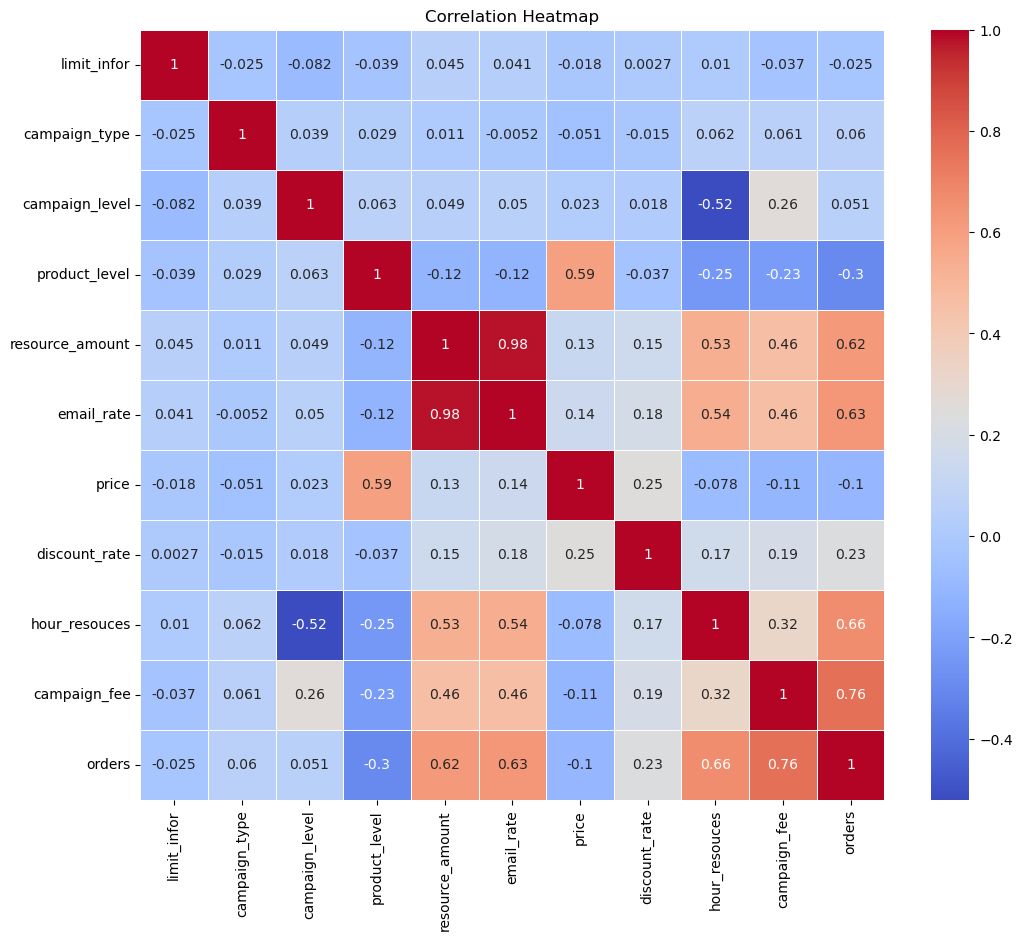

In [11]:
# Correlation analysis
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Based on the correlation matrix, we can identify features that are strongly correlated with the target variable (if you have one) or other important features.

# For example, if 'Sales' is your target variable, and you see a high positive correlation between 'Marketing Spend' and 'Sales',
# it suggests that 'Marketing Spend' is an important feature for predicting sales.

# Similarly, if you see a high negative correlation between 'Price' and 'Sales', it suggests that higher prices are associated with lower sales.


# To get a better understanding, let's list features with a correlation above a certain threshold (e.g., 0.5) with a target variable (assuming 'Sales' is the target variable):

target_variable = 'orders' # Replace 'Sales' with your actual target variable if different
correlation_with_target = correlation_matrix[target_variable]

important_features = correlation_with_target[abs(correlation_with_target) > 0.5]

print("Important features (correlation with target variable > 0.5):")
print(important_features)

# You can also analyze the correlation between other features and identify features that are strongly correlated with each other.
# This can be useful for feature selection and understanding potential multicollinearity issues.

Important features (correlation with target variable > 0.5):
resource_amount    0.619560
email_rate         0.625948
hour_resouces      0.662764
campaign_fee       0.760813
orders             1.000000
Name: orders, dtype: float64


                       sum_sq     df           F        PR(>F)
product_level    1.393479e+08    1.0   66.179378  1.782824e-15
resource_amount  9.397372e+08    1.0  446.301700  1.376434e-77
Residual         1.528673e+09  726.0         NaN           NaN


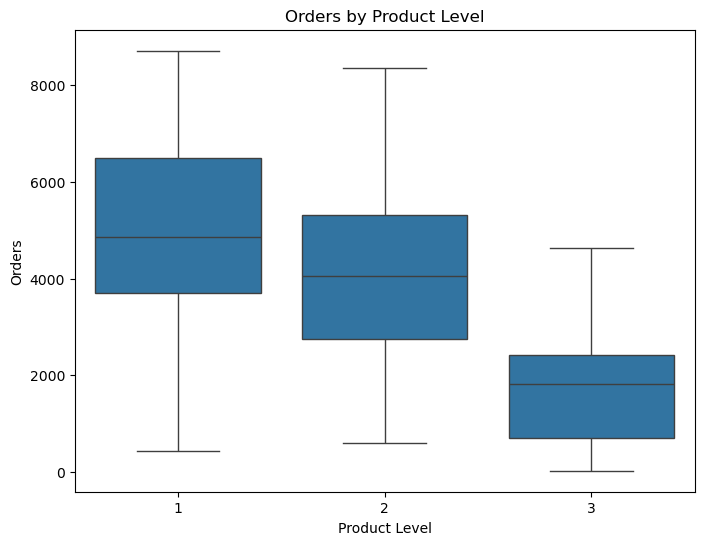

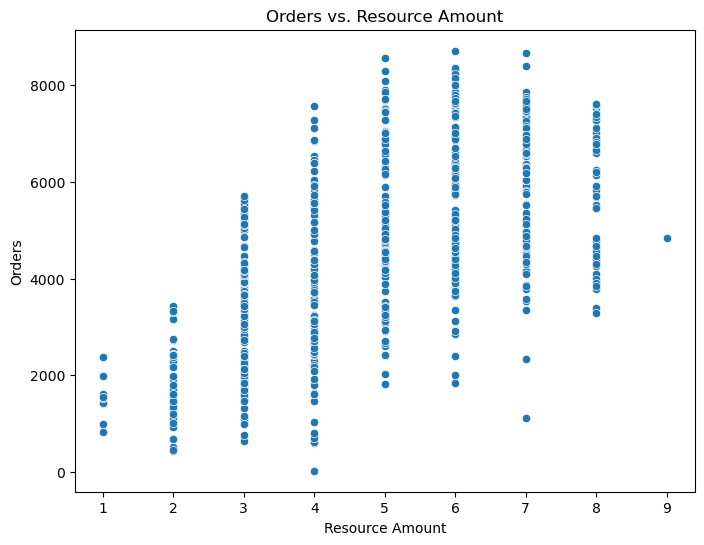


Descriptive statistics for orders by product level:
                      mean  median          std
product_level                                  
1              4905.943844  4862.0  1873.675864
2              4081.632653  4058.0  1792.214002
3              1803.285714  1817.0  1240.284449


In [13]:
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm

# Perform ANOVA to check the relationship between product level, resource amount, and orders
model = sm.ols('orders ~ product_level + resource_amount', data=df).fit()
anova_table = anova_lm(model, typ=2) # Call anova_lm directly

# Print the ANOVA table (already done in the preceding code)
print(anova_table)

# Visualize the relationship between product level and orders
plt.figure(figsize=(8, 6))
sns.boxplot(x='product_level', y='orders', data=df)
plt.title('Orders by Product Level')
plt.xlabel('Product Level')
plt.ylabel('Orders')
plt.show()

# Visualize the relationship between resource amount and orders
plt.figure(figsize=(8, 6))
sns.scatterplot(x='resource_amount', y='orders', data=df)
plt.title('Orders vs. Resource Amount')
plt.xlabel('Resource Amount')
plt.ylabel('Orders')
plt.show()

# Calculate descriptive statistics for orders by product level
orders_by_product_level = df.groupby('product_level')['orders'].agg(['mean', 'median', 'std'])
print("\nDescriptive statistics for orders by product level:")
print(orders_by_product_level)

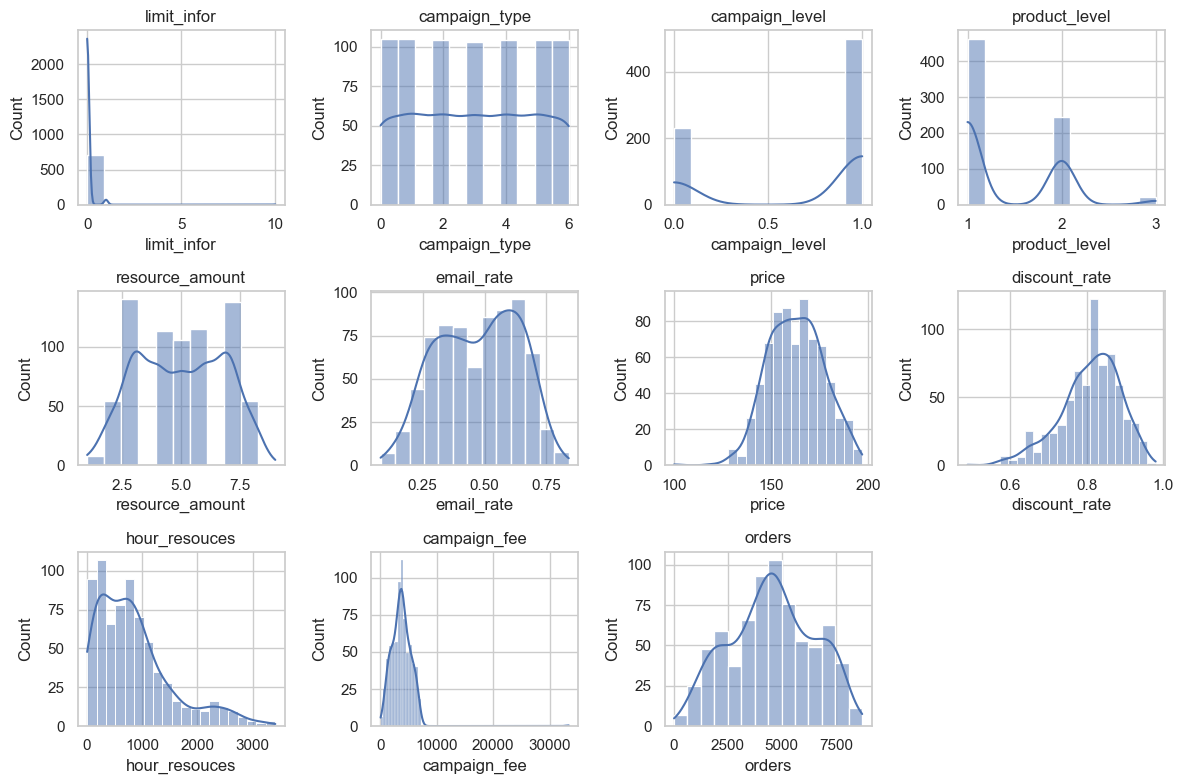

In [14]:
# Set the style for the plots
sns.set(style='whitegrid')

# Plot the distribution of numerical features
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

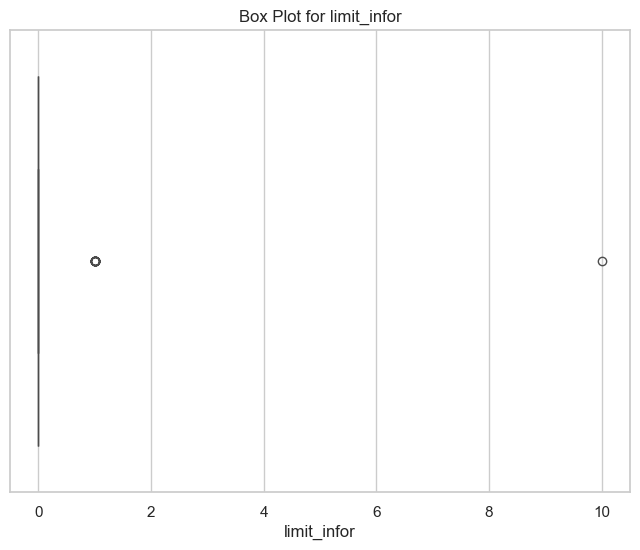

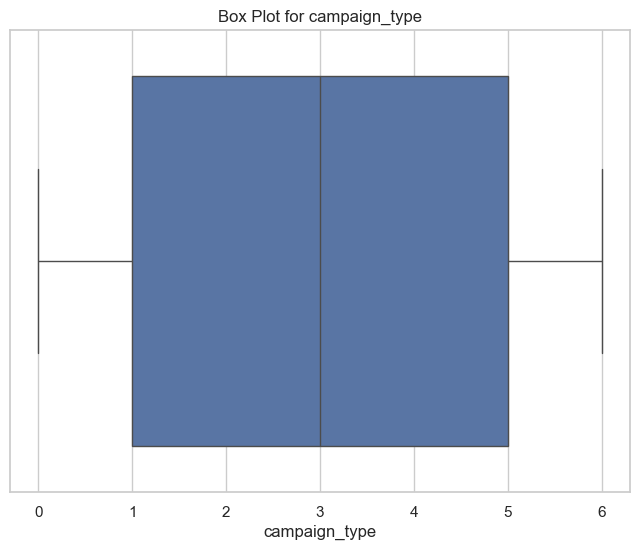

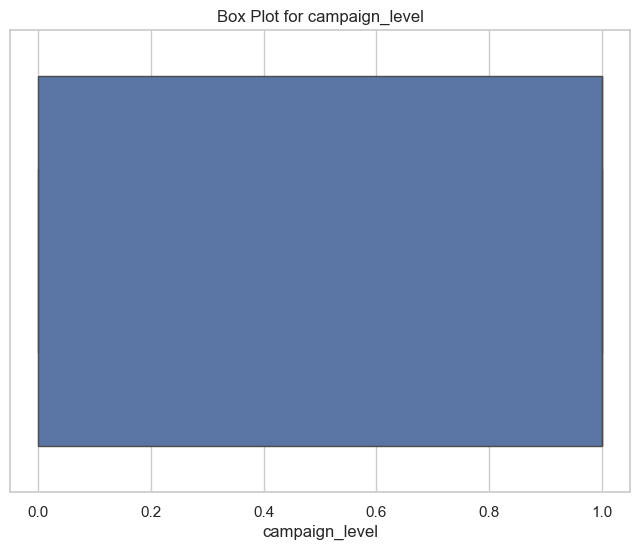

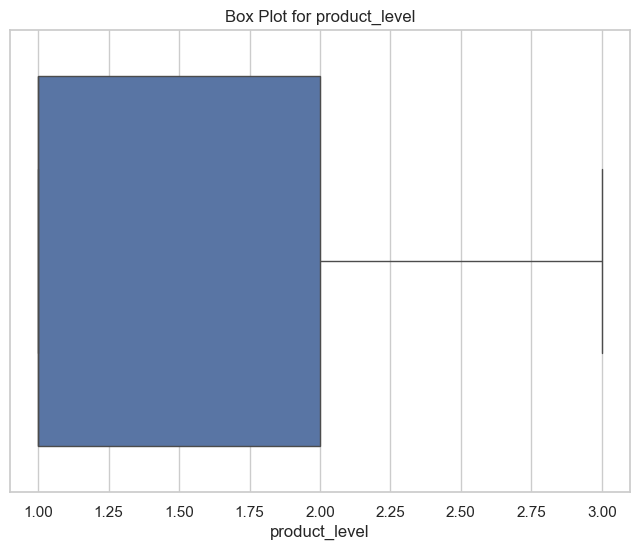

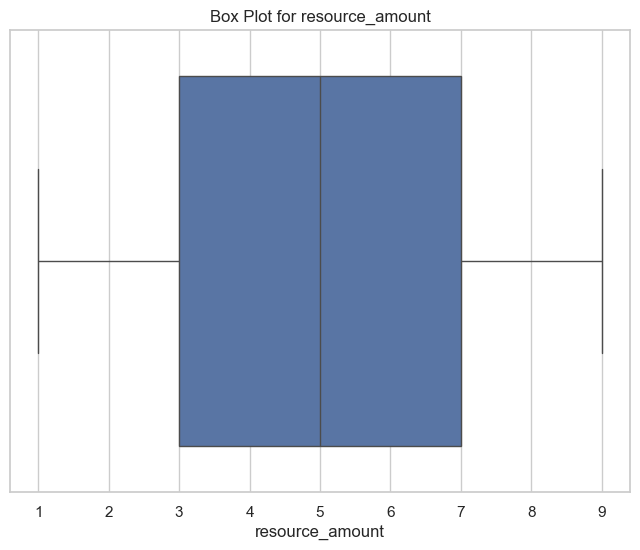

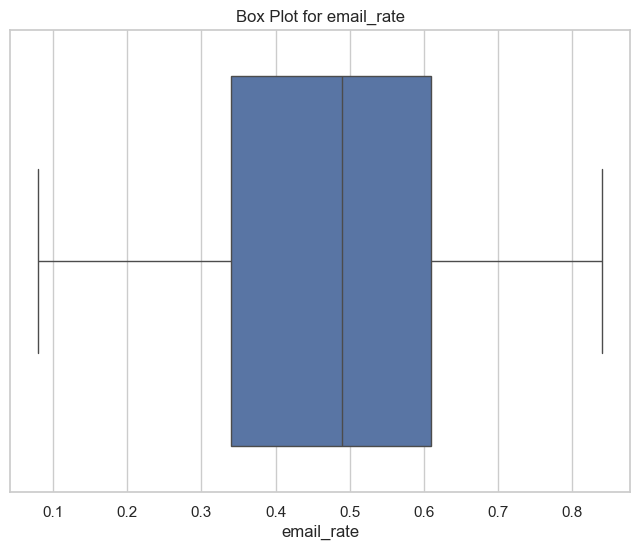

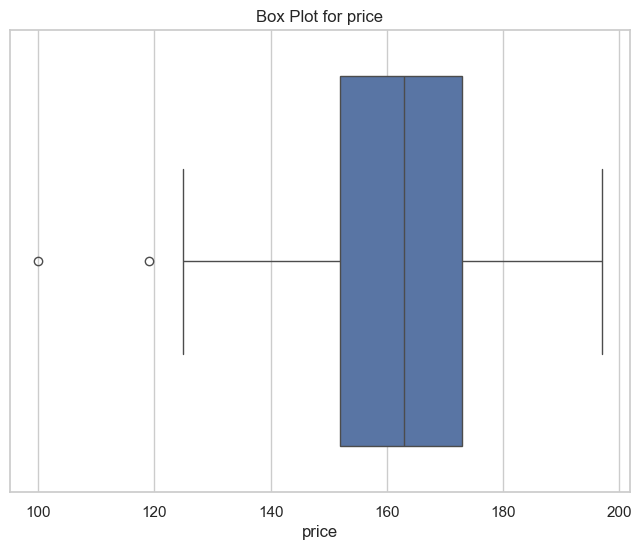

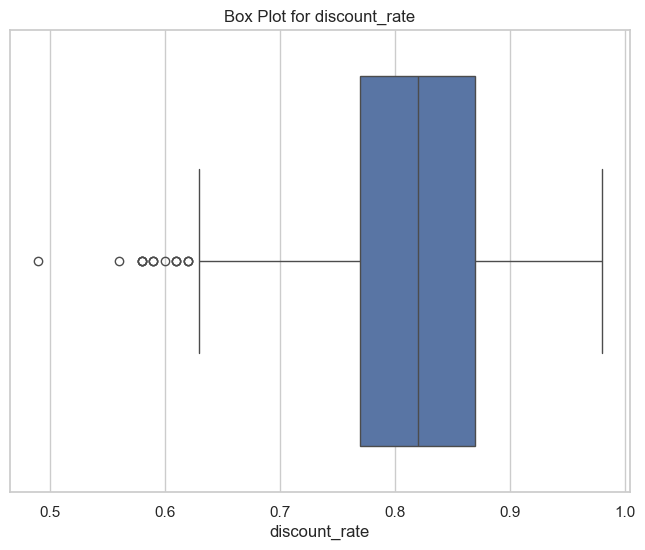

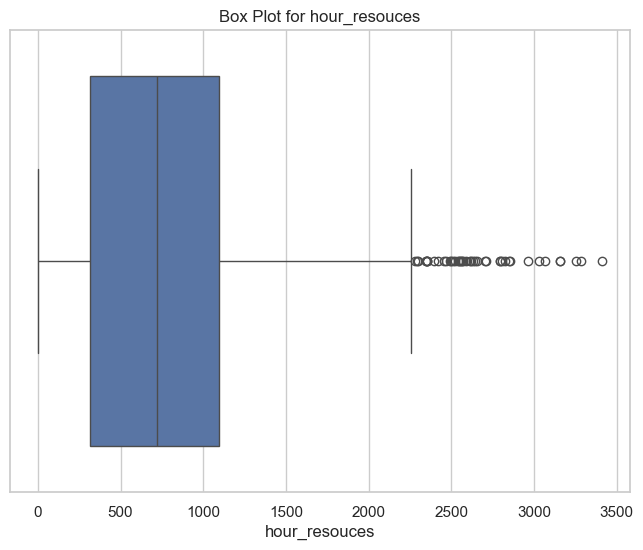

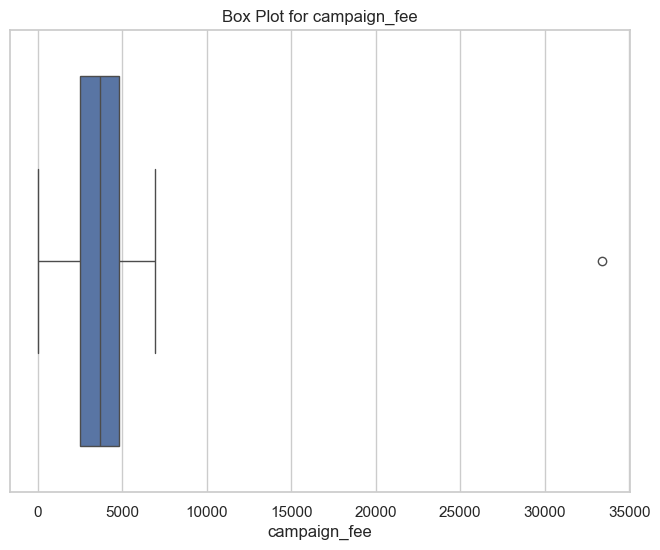

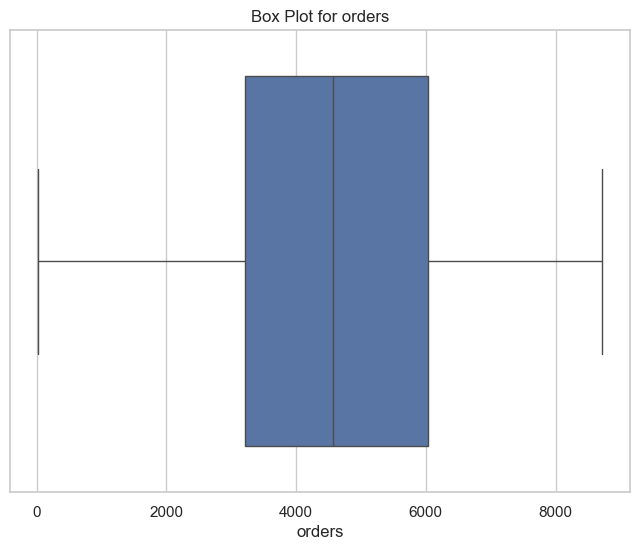

In [24]:
# Check for outliers using box plots for numerical features
numerical_features = df.select_dtypes(include=np.number)

for column in numerical_features.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Box Plot for {column}')
  plt.show()

In [25]:
# Check for outliers in numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers_summary = {}

# Define the detect_outliers function
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for column in numerical_columns:
    outliers = detect_outliers(df, column)
    outliers_summary[column] = len(outliers)

print("Number of outliers in each column:")
for column, count in outliers_summary.items():
    print(f"{column}: {count}")

Number of outliers in each column:
limit_infor: 22
campaign_type: 0
campaign_level: 0
product_level: 0
resource_amount: 0
email_rate: 0
price: 2
discount_rate: 16
hour_resouces: 44
campaign_fee: 1
orders: 0


In [26]:
df.shape

(729, 11)

In [30]:
# Separate features (X) and target (y)
X = df.drop(columns=['orders'])  # Replace 'target_variable_column'
y = df['orders']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed


# Now you can scale the features:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Assuming 'orders' is your target variable
X = df_clean.drop('orders', axis=1)
y = df_clean['orders']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (565, 10)
X_test shape: (142, 10)
y_train shape: (565,)
y_test shape: (142,)


In [32]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate each model
for name, model in models.items():
  model.fit(X_train, y_train)  # Train the model

  # Make predictions on the training and testing sets
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Evaluate the model using Mean Squared Error (MSE) and R-squared (R2)
  train_mse = mean_squared_error(y_train, y_train_pred)
  train_r2 = r2_score(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  test_r2 = r2_score(y_test, y_test_pred)

  print(f"Model: {name}")
  print(f"  Training MSE: {train_mse:.4f}")
  print(f"  Training R2: {train_r2:.4f}")
  print(f"  Testing MSE: {test_mse:.4f}")
  print(f"  Testing R2: {test_r2:.4f}")
  print("-" * 30)

Model: Linear Regression
  Training MSE: 731429.6907
  Training R2: 0.8038
  Testing MSE: 500411.4755
  Testing R2: 0.8586
------------------------------
Model: Decision Tree
  Training MSE: 0.0000
  Training R2: 1.0000
  Testing MSE: 223190.8521
  Testing R2: 0.9369
------------------------------
Model: Random Forest
  Training MSE: 24519.8785
  Training R2: 0.9934
  Testing MSE: 151118.1782
  Testing R2: 0.9573
------------------------------
Model: K-Nearest Neighbors
  Training MSE: 102252.4454
  Training R2: 0.9726
  Testing MSE: 142312.2470
  Testing R2: 0.9598
------------------------------


In [33]:
import statsmodels.api as sm

# Add a constant to the independent variables
X_train_with_constant = sm.add_constant(X_train)

# Fit the linear regression model using statsmodels
model = sm.OLS(y_train, X_train_with_constant).fit()

# Get the adjusted R-squared from the model summary
adjusted_r_squared = model.rsquared_adj

print(f"Adjusted R-squared: {adjusted_r_squared}")

Adjusted R-squared: 0.8005746560786939


In [34]:
# Based on the previous model evaluation, let's assume Random Forest is the best model.
# We'll now apply the adjusted R-squared to the Random Forest model.

# Note: Adjusted R-squared is typically used with linear regression models.
# Applying it to Random Forest might not be as meaningful or accurate.
# However, we can still use it to assess how well the model fits the data.

# Re-train the Random Forest model
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = best_model.predict(X_train)

# Add a constant to the independent variables for the training data
X_train_with_constant = sm.add_constant(X_train)

# Fit the OLS model using statsmodels with predictions as dependent variable
model_ols = sm.OLS(y_train, X_train_with_constant).fit()

# Get the adjusted R-squared from the OLS model
adjusted_r_squared_rf = model_ols.rsquared_adj

print("Best Model: Random Forest")
print(f"Adjusted R-squared (based on OLS with RF predictions): {adjusted_r_squared_rf}")

Best Model: Random Forest
Adjusted R-squared (based on OLS with RF predictions): 0.8005746560786939


           Feature  Importance
9     campaign_fee    0.872044
8    hour_resouces    0.114417
5       email_rate    0.004774
6            price    0.003179
7    discount_rate    0.002201
1    campaign_type    0.001617
4  resource_amount    0.001198
2   campaign_level    0.000340
3    product_level    0.000231
0      limit_infor    0.000000


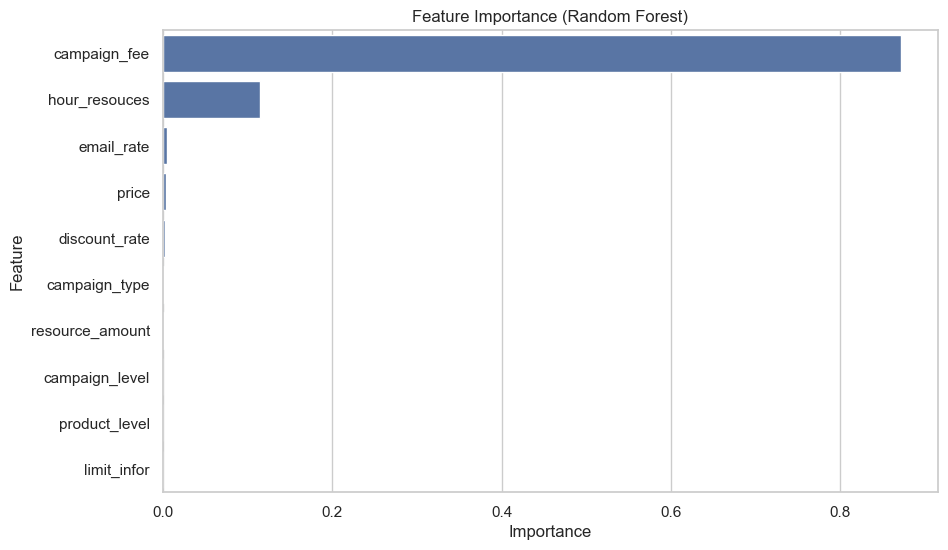

In [35]:
# Assuming 'best_model' is your trained Random Forest model
importances = best_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)

# You can also visualize the feature importances using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [36]:
# Assuming you want to identify the best model based on the testing R2 score
best_model_name = None
best_r2_score = float('-inf')  # Initialize with a very low value

for name, model in models.items():
  # Make predictions on the testing sets
  y_test_pred = model.predict(X_test)
  test_r2 = r2_score(y_test, y_test_pred)

  if test_r2 > best_r2_score:
    best_r2_score = test_r2
    best_model_name = name

print(f"The best performing model is: {best_model_name}")
print(f"Its R2 score on the test set is: {best_r2_score:.4f}")

The best performing model is: K-Nearest Neighbors
Its R2 score on the test set is: 0.9598


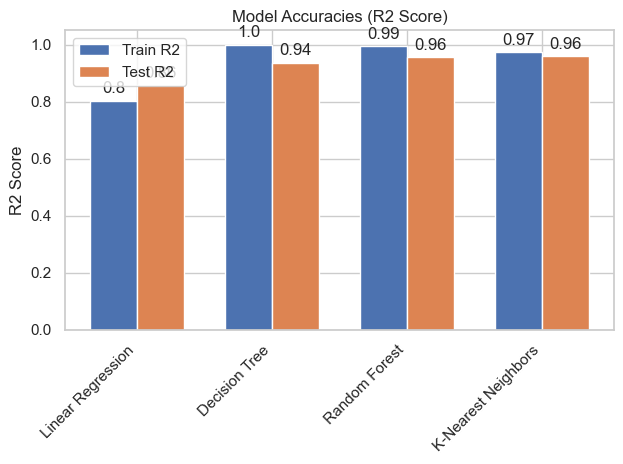

In [37]:
model_names = list(models.keys())
train_r2_scores = []
test_r2_scores = []

for name, model in models.items():
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  train_r2_scores.append(r2_score(y_train, y_train_pred))
  test_r2_scores.append(r2_score(y_test, y_test_pred))

# Create the bar chart
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_r2_scores, width, label='Train R2')
rects2 = ax.bar(x + width/2, test_r2_scores, width, label='Test R2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R2 Score')
ax.set_title('Model Accuracies (R2 Score)')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

# Add labels above the bars
def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


In [38]:
from sklearn.model_selection import GridSearchCV

# Assuming 'best_model' is your Random Forest model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_model_tuned = grid_search.best_estimator_
y_test_pred_tuned = best_model_tuned.predict(X_test)
test_r2_tuned = r2_score(y_test, y_test_pred_tuned)
print("Test R2 score with tuned model:", test_r2_tuned)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Test R2 score with tuned model: 0.9569554741684956
